# TP n°2: Simulation de la fermentation alcoolique

## Objectif

1. [Simuler le modèle de fermentation en réacteur batch](#simul)
2. [Comparer les sorties du modèle avec les données](#comparaison)

## <a name='simul'>1. Simulation de la fermentation en batch</a>

Le code suivant permet de simuler le modèle de fermentation en batch ($Q_{in}=0$)

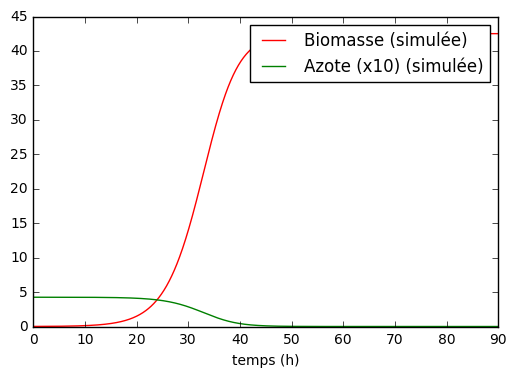

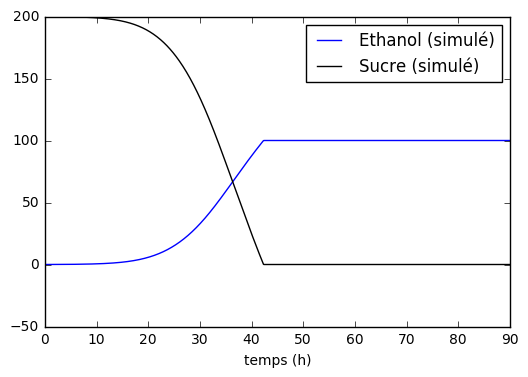

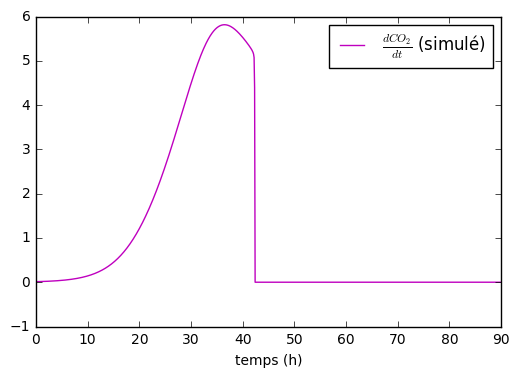

In [5]:
# code de simulation de la fermentation en batch

import numpy as np # numpy: vecteurs, matrices ...
import matplotlib.pyplot as plt # matplotlib: pour les graphiques
import scipy.integrate as scint

plt.close('all') # ferme toutes les figures

# modèle de fermentation en réacteur batch
def fermenteur(x,t,k1,k2,mu1max,mu2max,KN,KE,KS):
    # variables d'état du systèeme
    B = x[0] # biomasse
    N = x[1] # azote
    E = x[2] # ethanol
    S = x[3] # sucre
    
    # initialisation du vecteur second membre du système
    dx = np.zeros(4) # dérivées de B, N, E et S
    
    # calcul de mu1(S)
    mu1 = mu1max*N/(KN+N)
    # calcul de mu2(E,S)
    mu2 = mu2max*S/(KS+S)*KE/(KE+E)
    
    # second membre de l'équation de B
    dx[0] = mu1*B
    # second membre de l'équation de N
    dx[1] = -k1*mu1*B
    # second membre de l'équation de E
    dx[2] = mu2*B
    # second membre de l'équation de S
    dx[3] = -k2*mu2*B
    return dx
    
# paramètres du modèle
k1 = 0.01 # -
k2 = 2.0 # -
mu1max = 1.2 # 1/h
mu2max = 1.2 # 1/h
KN = 1.6 # g/L
KE = 12. # g/L
KS = 0.03 # g/L

t0 = 0  # instant initial de la simulation
tf = 90  # instant final de la simulation

# vecteur temps
t = np.arange(t0,tf,0.1)

# conditions initiales
x0 = np.array([0.01, 0.425, 0, 200])

# intégration numérique de l'EDO
y = scint.odeint(fermenteur,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS))

# tracé des sorties du modèles
plt.figure(1)
plt.plot(t,y[:,0],'r',label='Biomasse (simulée)')
plt.plot(t,y[:,1]*10,'g',label='Azote (x10) (simulée)')
plt.legend()
plt.xlabel('temps (h)')

plt.figure(2)
plt.plot(t,y[:,2],'b',label='Ethanol (simulé)')
plt.plot(t,y[:,3],'k',label='Sucre (simulé)')
plt.legend()
plt.xlabel('temps (h)')

plt.figure(3)
plt.plot(t,mu2max*y[:,3]/(KS+y[:,3])*KE/(KE+y[:,2])*y[:,0],'m',label=r'$\frac{dCO_2}{dt}$ (simulé)')
plt.legend()
plt.xlabel('temps (h)')

plt.show()

## <a name='comparaison'>2. Comparaison du modèle avec les données</a>

Le code suivant permet de comparer les sorties du modèle avec des données expérimentales qui sont stockées dans le fichier batch.txt

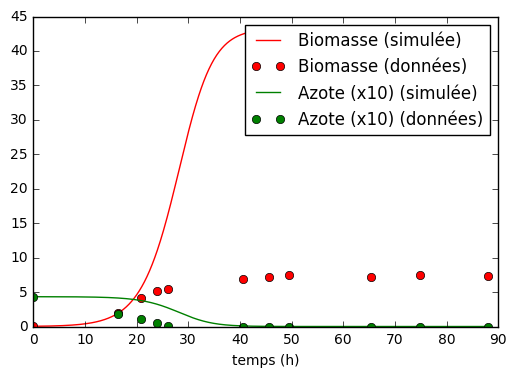

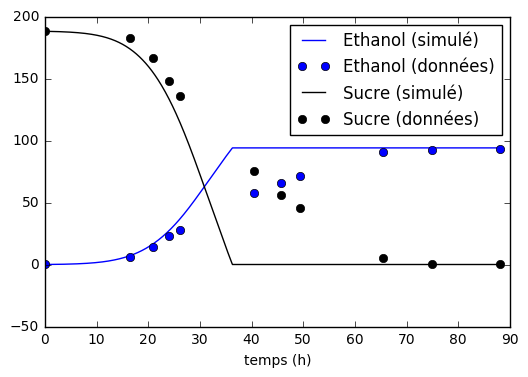

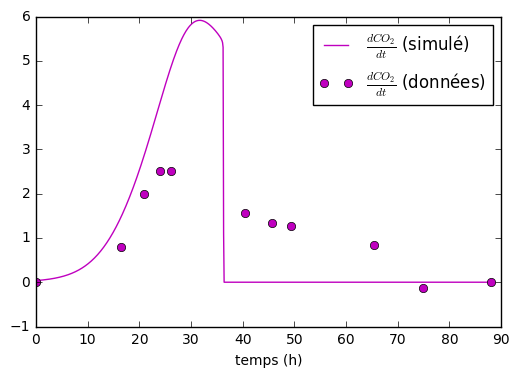

In [6]:
# Chargement des données expérimentales qui sont stockées dans le fichier batch.txt
Data = np.loadtxt('batch.txt')
Datatime = Data[:,0] #temps
DataB2 = Data[:,1] # biomasse en 10^6 cell/mL
DataB = Data[:,6] # biomasse en g/L
DataN = Data[:,2]/1000 # azote
DataE = Data[:,3] # ethanol
DataS = Data[:,4] # sucre
DataCO2 = Data[:,5]/100 # taux de production de CO2

t0 = Datatime[0]  # instant initial de la simulation
tf = Datatime[-1] # instant final de la simulation

# vecteur temps
t = np.arange(t0,tf,0.1)

# conditions initiales
x0 = np.array([DataB[0], DataN[0], 0, DataS[0]])

# intégration numérique de l'EDO
y = scint.odeint(fermenteur,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS))

# tracé des sorties du modèle et comparaison avec les données
plt.figure(1)
plt.plot(t,y[:,0],'r',label='Biomasse (simulée)')
plt.plot(Datatime,DataB,'ro',label='Biomasse (données)')
plt.plot(t,y[:,1]*10,'g',label='Azote (x10) (simulée)')
plt.plot(Datatime,DataN*10,'go',label='Azote (x10) (données)')
plt.legend()
plt.xlabel('temps (h)')

plt.figure(2)
plt.plot(t,y[:,2],'b',label='Ethanol (simulé)')
plt.plot(Datatime,DataE,'bo',label='Ethanol (données)')
plt.plot(t,y[:,3],'k',label='Sucre (simulé)')
plt.plot(Datatime,DataS,'ko',label='Sucre (données)')
plt.legend()
plt.xlabel('temps (h)')

plt.figure(3)
plt.plot(t,mu2max*y[:,3]/(KS+y[:,3])*KE/(KE+y[:,2])*y[:,0],'m',label=r'$\frac{dCO_2}{dt}$ (simulé)')
plt.plot(Datatime,DataCO2,'mo',label=r'$\frac{dCO_2}{dt}$ (données)')
plt.legend()
plt.xlabel('temps (h)')

plt.show()